<a href="https://colab.research.google.com/github/viveknarapongu2801/vivek/blob/main/svm_wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**load all required libreries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Read data**

In [ ]:
df=pd.read_csv('/content/wine_fraud.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


**Target variable is quality so check unique values in quality**

In [ ]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


**create a count plot that displays the count per catogery legit vs fruad**


--> check weather data is balanced or imbalanced

In [ ]:
df['quality'].value_counts()

,count
quality,
Legit,6251
Fraud,246


<Axes: xlabel='quality', ylabel='count'>

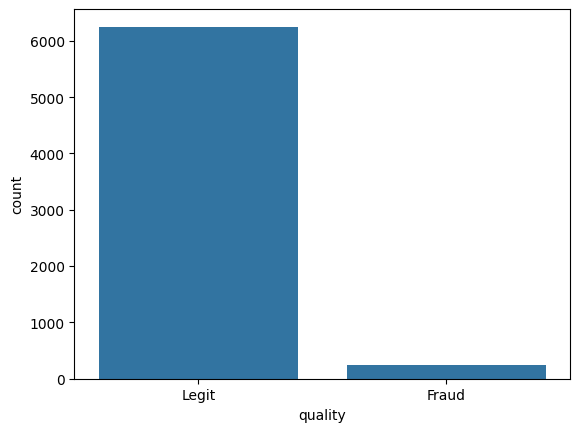

In [ ]:
sns.countplot(x='quality',data=df)

**find out if there is any diffrece in fruad when it comes to type wine**

<Axes: xlabel='type', ylabel='count'>

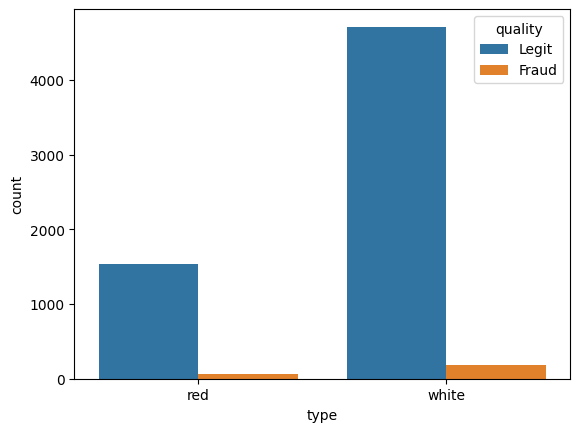

In [ ]:
sns.countplot(x='type',hue='quality',data=df)

**what percentage of redwine is fruad and what percentage of white wine is fruad**

In [ ]:
reds=df[df['type']=='red']
whites=df[df['type']=='white']

In [ ]:
print("percentage of fraud in red wines")
print(100*(len(reds[reds['quality']=='Fraud'])/len(reds)))

percentage of fraud in red wines
3.9399624765478425


In [ ]:
print("percentage of fraud in white wines")
print(100*(len(whites[whites['quality']=='Fraud'])/len(whites)))

percentage of fraud in white wines
3.7362188648427925


**caluculate the correlation between the various columns and the "quality" column**

In [ ]:
#to check the co-relation we need to map the column to 0 and 1 instead of strings
df['Fraud'] = df['quality'].map({'Legit':0,'Fraud':1})

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,fraud,Fraud
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,NaN,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red,NaN,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red,NaN,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red,NaN,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,NaN,0


In [ ]:
df = df.drop('fraud', axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,Fraud
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red,0


In [ ]:
df['Fraud'].unique()

array([0, 1])

In [ ]:
df.drop(columns=['quality','type'],inplace=True)

In [ ]:
df.corr()['Fraud']

,Fraud
fixed acidity,0.021794
volatile acidity,0.151228
citric acid,-0.061789
residual sugar,-0.048756
chlorides,0.034499
free sulfur dioxide,-0.085204
total sulfur dioxide,-0.035252
density,0.016351
pH,0.020107
sulphates,-0.034046


**Create a barplot of the correlation values to Fraudlent wine**

<Axes: >

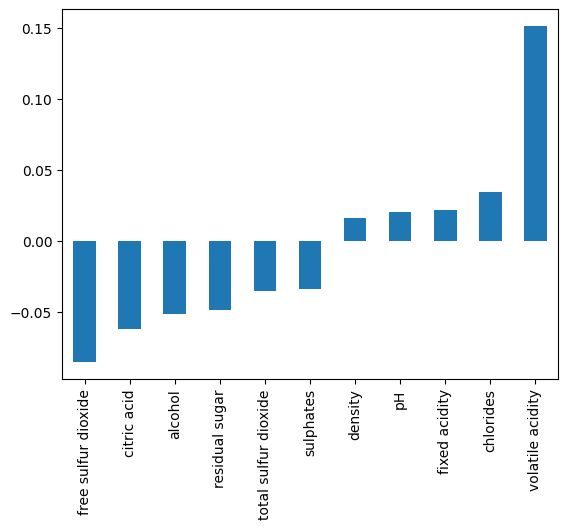

In [ ]:
df.corr()['Fraud'][:-1].sort_values().plot(kind='bar')

<Axes: >

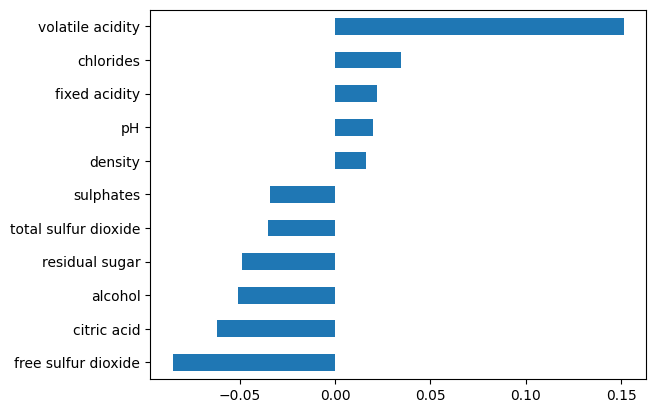

In [ ]:
df.corr()['Fraud'][:-1].sort_values().plot(kind='barh')

**create a cluster map with seaborn to explore the relationship b/n variables**

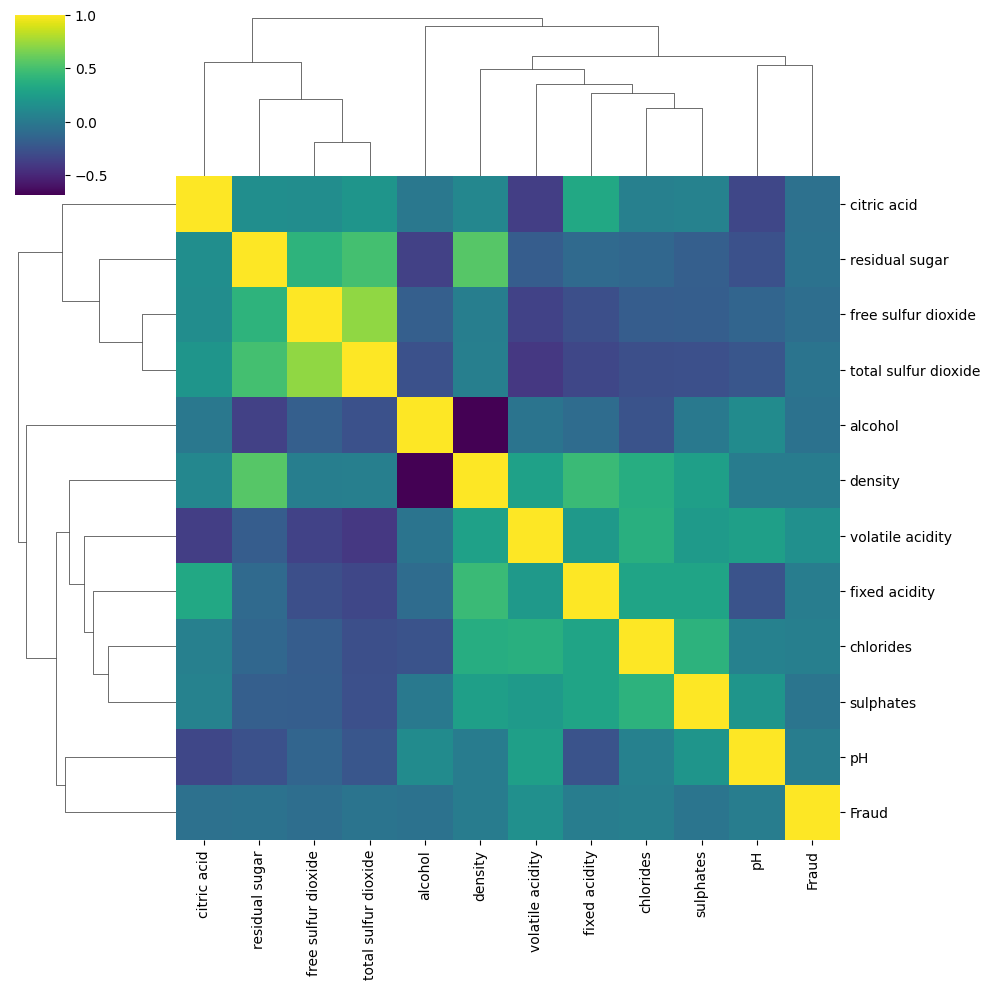

In [ ]:
sns.clustermap(df.corr(),cmap='viridis')

**Apply the Machine learning model**

In [ ]:
df=pd.read_csv('/content/wine_fraud.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


**convert the categorical column "type" from a string or "red" or "white" to dummy variables**

In [ ]:
df['type']=pd.get_dummies(df['type'],drop_first=True)
# get dummies is used for one hot encoding
#"drop_first" tells the pandas to drop the forst dummy columns to avoid the multicolinearity

**separate out the data into x feature and y target label**

In [ ]:
X=df.drop('quality',axis=1)
y=df['quality']

**perform the train test split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.1,random_state=101)

***scale the xtrain and xtest data***

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

**it is a classification problem apply SVC**

In [ ]:
from sklearn.svm import SVC
svc = SVC(class_weight='balanced')
#class_weight tells SVC how much importence (weight) to give to each class during training

**to find the best values of gamma parameters and best c value we use GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)

In [ ]:
# fit the data into model
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [ ]:
grid_predict = grid.predict(scaled_X_test)

***Evaluate the model***

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,grid_predict)

array([[ 17,  10],
       [ 92, 531]])

In [ ]:
print(classification_report(y_test,grid_predict))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650

